In [1]:
pip install ucimlrepo

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
htru2 = fetch_ucirepo(id=372)

# data (as pandas dataframes)
X = htru2.data.features
y = htru2.data.targets
X = X.apply(lambda col: col.fillna(col.mean()), axis=0)
# metadata
print(htru2.metadata)

# variable information
print(htru2.variables)


{'uci_id': 372, 'name': 'HTRU2', 'repository_url': 'https://archive.ics.uci.edu/dataset/372/htru2', 'data_url': 'https://archive.ics.uci.edu/static/public/372/data.csv', 'abstract': 'Pulsar candidates collected during the HTRU survey. Pulsars are a type of star, of considerable scientific interest. Candidates must be classified in to pulsar and non-pulsar classes to aid discovery.', 'area': 'Physics and Chemistry', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 17898, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5DK6R', 'creators': ['Robert Lyon'], 'intro_paper': {'ID': 460, 'type': 'NATIVE', 'title': 'Fifty years of pulsar candidate selection: from simple filters to a new principled real-time classification approach', 'a

In [22]:
import random
init_centroids = random.sample(range(0, len(htru2)), 3)
init_centroids


[0, 1, 2]

In [26]:
init_centroids = random.sample(range(0, len(X)), 3)
centroids = []
for i in init_centroids:
    centroids.append(X.iloc[i])

centroids
centroids = np.array(centroids)

In [30]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [32]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for _, row in X.iterrows():
        distances = [calc_distance(row.values, centroid) for centroid in ic]
        assigned_centroid.append(np.argmin(distances))
    return assigned_centroid

In [33]:
get_centroids = findClosestCentroids(centroids, X)
get_centroids

[2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 2,


In [36]:
new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(get_centroids, columns=['cluster'])],axis=1)

In [45]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return np.array(new_centroids)

In [47]:
for i in range(10):
    get_centroids = findClosestCentroids(centroids, X)
    centroids = calc_centroids(get_centroids, X)
final_clusters = findClosestCentroids(centroids, X)
X_array = X.values

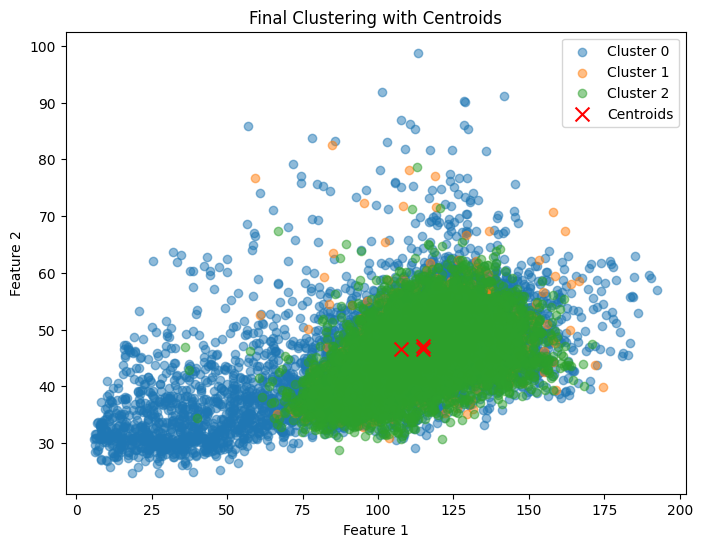

In [48]:
plt.figure(figsize=(8, 6))
for cluster_id in set(final_clusters):
    cluster_points = X_array[np.array(final_clusters) == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], alpha=0.5, label=f"Cluster {cluster_id}")
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label="Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Final Clustering with Centroids")
plt.show()